In [50]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
from onix.analysis.probe import Probe
from onix.analysis.fitter import Fitter
from onix.data_tools import get_experiment_data, open_analysis_folder, get_analysis_file_path
from onix.helpers import data_identifier, console_bold, present_float

In [63]:
name = "Hole Lifetime"
analysis_number = None
identifier = None

In [64]:
def add_label(ax, x=0.02, y=1.1):
    ax.text(x, y, identifier, transform=ax.transAxes)

In [124]:
def data_to_probe(data_number):
    data_index = data_numbers.index(data_number)
    data, headers = all_data[data_index]
    probe_repeats = headers["params"]["num_of_probes"]
    p = Probe(data["photodiode_times"], data["photodiode_voltages"], {"probe": probe_repeats})

    pre_probe_delay = headers["params"]["ttl_probe_offset_time"].to("s").magnitude
    on_time = headers["params"]["probe_on_time"].to("s").magnitude
    off_time = headers["params"]["probe_off_time"].to("s").magnitude
    rise_delay = 3e-6
    fall_delay = 1e-6
    probe_detunings = headers["params"]["probe_detunings"].to("MHz").magnitude
    p.set_probe_times(pre_probe_delay, on_time, off_time, rise_delay, fall_delay, probe_detunings)
    return p

In [647]:
data_numbers = [779]
all_data = [get_experiment_data(kk) for kk in data_numbers]
probes = [data_to_probe(kk) for kk in data_numbers]
identifier = "data " + data_identifier(data_numbers)# + ", analysis " + data_identifier([analysis_number])

In [648]:
index = 0
p = probes[index]
data_number = data_numbers[index]

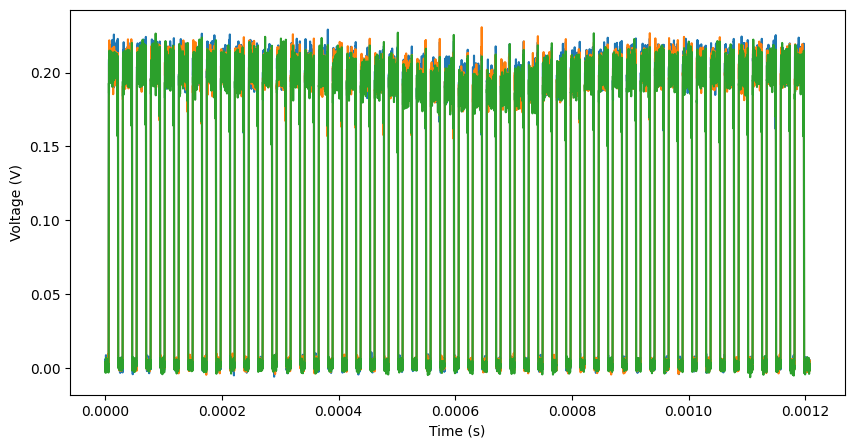

In [649]:
fig, ax = plt.subplots(figsize=(10, 5))
group_name = "probe"
reshape_size = (
    p.transmission_groups[group_name].shape[0] * p.transmission_groups[group_name].shape[1],
    p.transmission_groups[group_name].shape[2]
)
ax.plot(p.times, p.transmission_groups[group_name].reshape(*reshape_size)[0:3].T)
#ax.plot(p.times, p.transmission_groups[group_name].reshape(*reshape_size)[3:6].T)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage (V)")
plt.show()

No repeats found. Using the dataset standard error.
No repeats found. Using the dataset standard error.
No repeats found. Using the dataset standard error.
No repeats found. Using the dataset standard error.
No repeats found. Using the dataset standard error.
No repeats found. Using the dataset standard error.
No repeats found. Using the dataset standard error.
No repeats found. Using the dataset standard error.
No repeats found. Using the dataset standard error.
No repeats found. Using the dataset standard error.


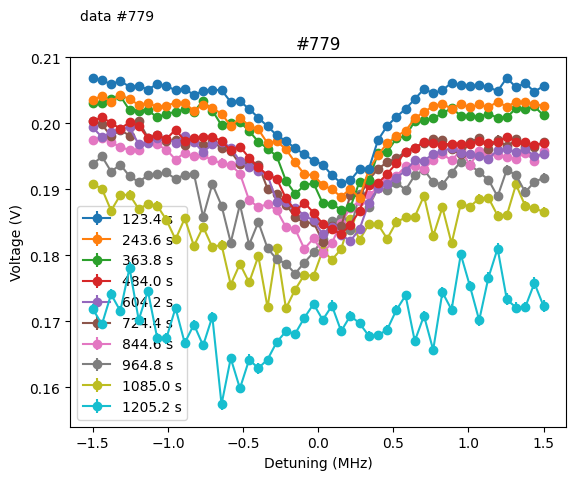

In [664]:
fig, ax = plt.subplots()
add_label(ax)
heights = []
times = []
min_index = []
zorder = 100
for kk in range(len(p.averages("probe", mode="probe_repeats"))):
    if kk < 0 or kk > 9:
        continue
    signal = p.averages("probe", mode="probe_repeats")[kk]
    error = p.errors("probe", mode="probe_repeats")[kk]
    time = all_data[index][0]["probe_times"][kk]
    min_index.append(p.probes[signal.argmin()])
    times.append(time)
    #heights.append(max(signal) - np.average(signal))
    heights.append(min(signal) - np.average(signal))
    ax.errorbar(p.probes, signal, error, label=f"{time:.1f} s", marker="o", zorder=zorder-kk)
ax.legend()
ax.set_title(f"#{data_number}")
ax.set_xlabel("Detuning (MHz)")
ax.set_ylabel("Voltage (V)")
plt.show()

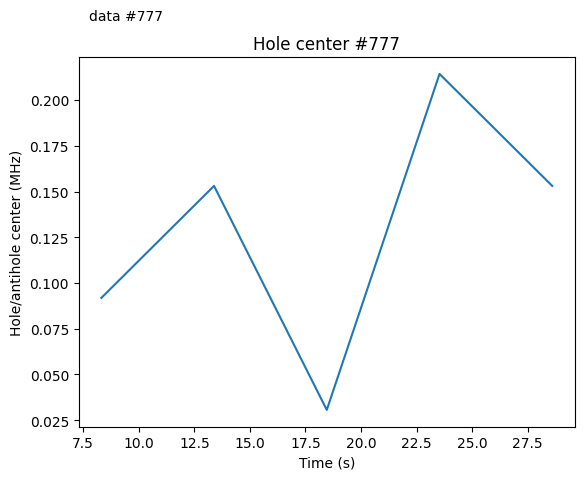

In [642]:
fig, ax = plt.subplots()
add_label(ax)
ax.plot(times, min_index)
ax.set_title(f"Hole center #{data_number}")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Hole/antihole center (MHz)")
plt.show()